1. Import thư viện và đọc dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị biểu đồ
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Đọc dữ liệu
# Encoding 'ISO-8859-1' thường được dùng cho dataset bán lẻ có chứa ký tự đặc biệt
df = pd.read_csv('D:\\doan_khdl\\data_science_project\\data_science_ecommerce\\src\\data\\raw\\online_retail.csv', encoding='ISO-8859-1')

print("Đã tải xong dữ liệu!")

Đã tải xong dữ liệu!


2. Kiểm tra tổng quan

In [ ]:
print("--- 5 dòng đầu tiên ---")
display(df.head())

print("\n--- Thông tin bộ dữ liệu ---")
print(df.info())

print("\n--- Thống kê mô tả ---")
display(df.describe())

--- 5 dòng đầu tiên ---


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom



--- Thông tin bộ dữ liệu ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

--- Thống kê mô tả ---


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


3. Làm sạch dữ liệu

In [ ]:
# 1. Chuyển đổi InvoiceDate sang datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 2. Loại bỏ dữ liệu trùng lặp
print(f"Số lượng dòng trước khi xóa trùng: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Số lượng dòng sau khi xóa trùng: {df.shape[0]}")

# 3. Lọc bỏ các đơn hàng bị hủy (Quantity < 0) hoặc lỗi giá (UnitPrice <= 0)
df_cleaned = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()

print(f"Số lượng dòng sau khi làm sạch: {df_cleaned.shape[0]}")

C:\Users\user\AppData\Local\Temp\ipykernel_13720\3857035097.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Số lượng dòng trước khi xóa trùng: 541909
Số lượng dòng sau khi xóa trùng: 536641
Số lượng dòng sau khi làm sạch: 524878


4. Tạo cột Doanh thu và Cột Tháng

In [ ]:
# Tính tổng tiền cho mỗi dòng
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Tạo cột tháng (dạng Year-Month) để vẽ biểu đồ theo thời gian
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')

print("Đã tạo thêm cột 'TotalAmount' và 'Month'.")
display(df_cleaned.head())

Đã tạo thêm cột 'TotalAmount' và 'Month'.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


5. Biểu đồ xu hướng doanh thu theo tháng

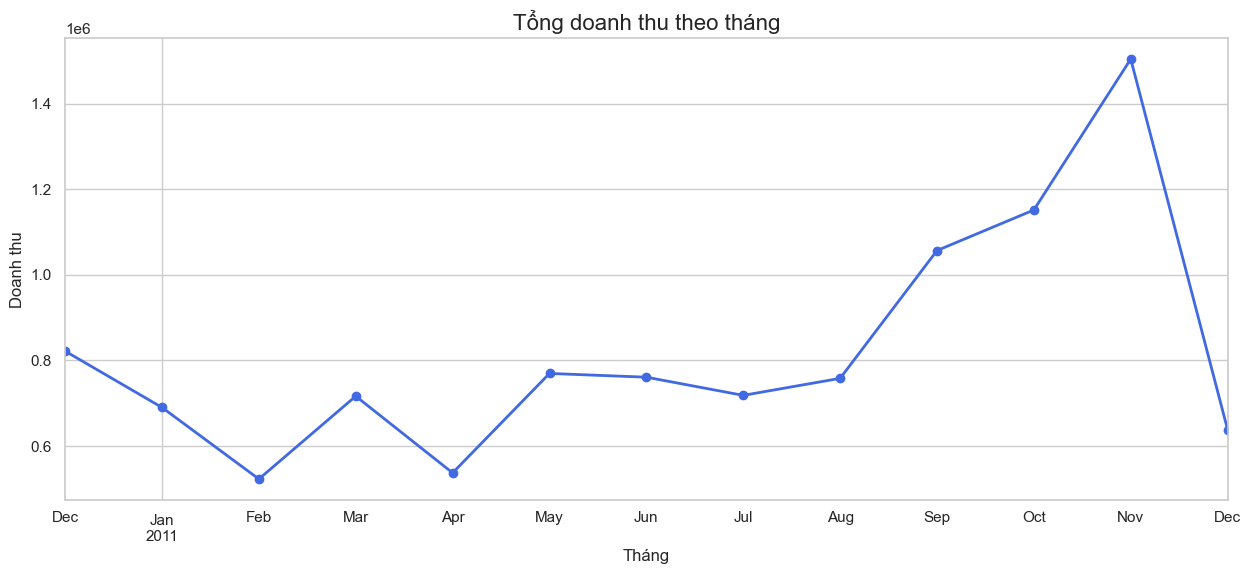

In [ ]:
monthly_sales = df_cleaned.groupby('Month')['TotalAmount'].sum()

plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o', linewidth=2, color='royalblue')
plt.title('Tổng doanh thu theo tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.grid(True)
plt.show()

- Doanh thu đạt đỉnh rõ rệt vào tháng 11–12, phản ánh nhu cầu tăng mạnh dịp cuối năm.

- Trong giai đoạn từ tháng 8 đến tháng 11, doanh thu tăng liên tục, cho thấy hiệu quả bán hàng cao hơn ở nửa cuối năm.

- Biến động chu kỳ: Sau tháng 12, doanh thu giảm xuống mức thấp hơn ở tháng 1–2, thể hiện sự chững lại sau mùa mua sắm cao điểm.


6. Top 10 sản phẩm bán chạy nhất (theo số lượng)

C:\Users\user\AppData\Local\Temp\ipykernel_13720\1029269029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


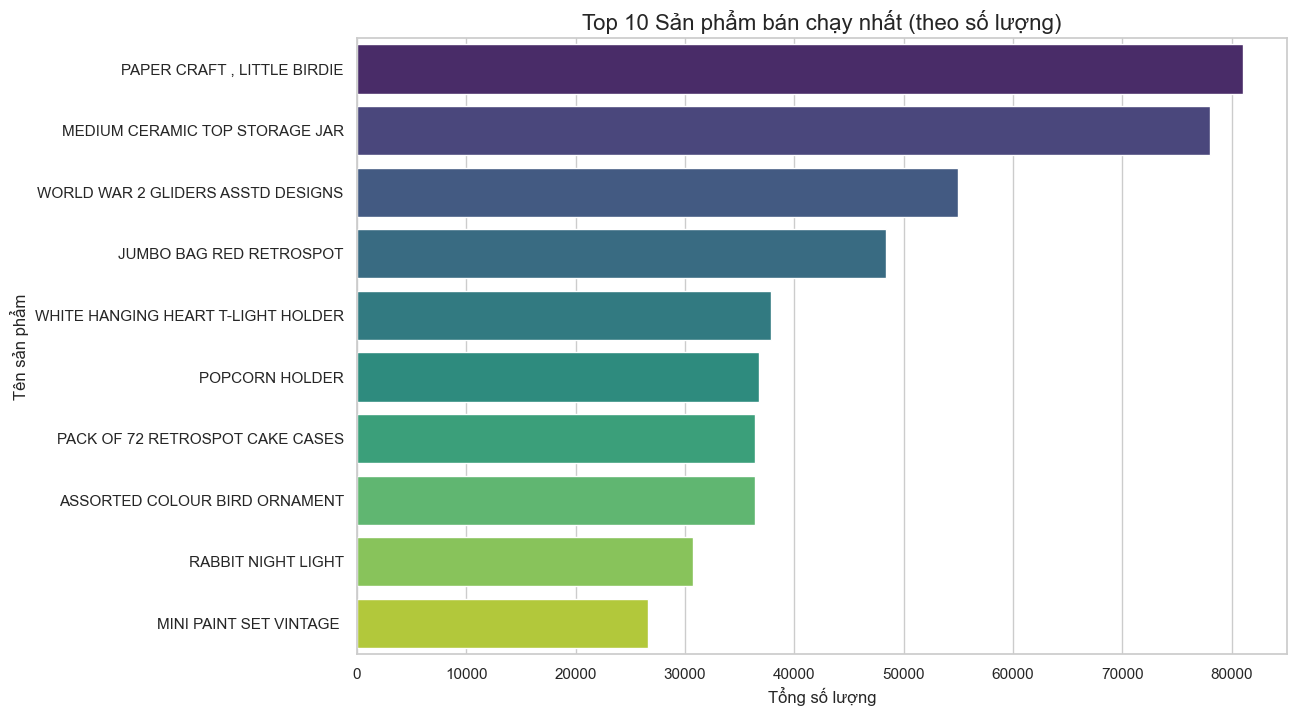

In [ ]:
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Sản phẩm bán chạy nhất (theo số lượng)', fontsize=16)
plt.xlabel('Tổng số lượng', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.show()

- Sản phẩm PAPER CRAFT dẫn đầu về số lượng bán.
- Hai sản phẩm top đầu vượt trội so với phần còn lại.
- Các mặt hàng quà tặng/trang trí chiếm đa số trong Top 10.
- Doanh số giảm dần ở các sản phẩm cuối bảng.

7. Top 10 Quốc gia có doanh thu cao nhất

C:\Users\user\AppData\Local\Temp\ipykernel_13720\4165815303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='magma')


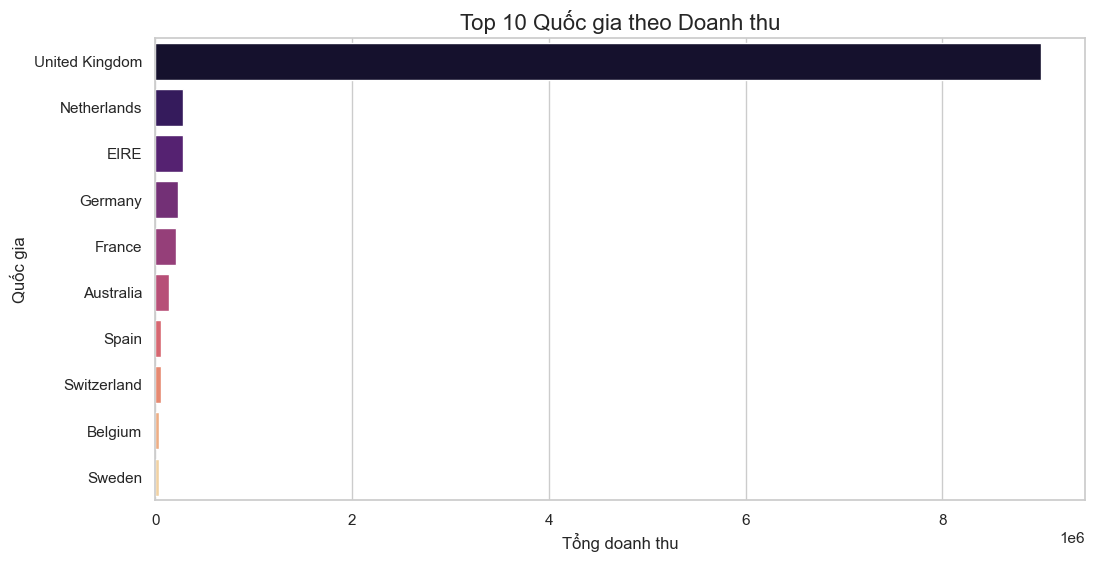

In [ ]:
country_sales = df_cleaned.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='magma')
plt.title('Top 10 Quốc gia theo Doanh thu', fontsize=16)
plt.xlabel('Tổng doanh thu', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.show()

- Thị trường chủ lực tập trung gần như hoàn toàn ở UK, chiếm doanh thu áp đảo so với các quốc gia khác.